<img src="https://bioinf.nl/~davelangers/hanze.png" align="right" />

# <span id="0">Casus *Eiwitstructuur en -dynamica*</span>

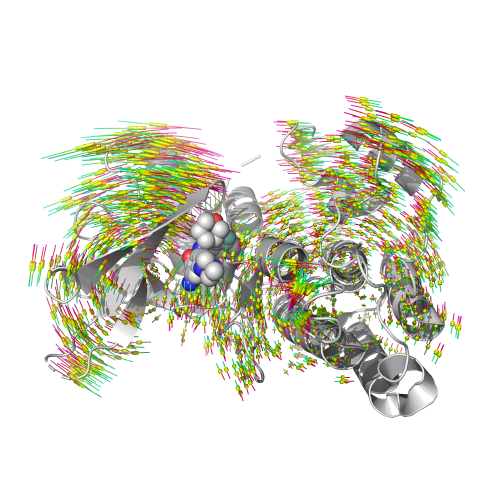

In deze casus maak je kennis met [Structuurvoorspelling](https://en.wikipedia.org/wiki/Protein_structure_prediction); het bepalen van een eiwitstructuur op basis van de sequentie van de aminozuren, en [Moleculaire Dynamica](https://en.wikipedia.org/wiki/Molecular_dynamics); een computersimulatie methode om het gedrag van moleculen te begrijpen in relatie tot de chemische en mechanische eigenschappen. Het doel van deze casus is inzicht krijgen in de werking van eiwitten als moleculaire machines en de tools om dat te bestuderen.

* **<a href="#Les-1:-Modelleren">Les 1: Modelleren met Alphafold en Gromacs</a>**

* **<a href="#Les-2:-Visualisatie">Les 2: Visualisatie van eiwitten en dynamica met PyMOL</a>**

* **<a href="#Les-3:-Analyse">Les 3: Beschrijvende analyse</a>**

* **<a href="#Les-4:-Vergelijking">Les 4: Vergelijkende analyse van wild-type en mutant</a>**

* **<a href="#Les-5:-Verslaglegging">Les 5: Visualisatie en verslaglegging</a>**


Als je uitgebreider aan de slag wil met een ander eiwit dan zou je dat kunnen doen in je verdiepend project.


 
<div class="alert alert-warning">
    
# ⚠️

**Opmerking:** Implementeer de functionaliteit in deze casus die gevraagd wordt onder de "Opdracht" kopjes (d.w.z. de python scripts en module) zelf gebruikmakend van alle [standaardmodules](https://docs.python.org/3/library/index.html) van python, maar maak geen wrappers rond bestaande externe modules, tenzij expliciet anders wordt vermeld; voor de "Toepassing" onderdelen (d.w.z. de notebooks) ben je vrij om te gebruiken wat je wil. Houd je werk bij in een (gezamenlijke) repository die je na afloop inlevert via BrightSpace.

</div>

***

## Les 1: Modelleren met Alphafold en Gromacs

### Inleiding

De functie van eiwitten wordt bepaald door de chemische en de mechanische eigenschappen, die volgen uit de structuur en uit de volgorde van aminozuren. Een mutatie kan de functie van een eiwit verstoren door de werking te remmen of juist door de activiteit te verhogen. Beide kunnen een rol spelen bij het ontstaan van kanker, bijvoorbeeld door uitval van beschermende (controle) eiwitten en door permanente activatie van groeifactoren. Een belangrijke rol in de laatste categorie wordt gespeeld door de familie van receptor tyrosine kinases, zoals bijvoorbeeld FGFR, VEGFR, ALK en ROS1. Dit zijn dimere receptoren, die geactiveerd worden door een groeifactor, maar waarbij mutaties er voor kunnen zorgen dat de receptor altijd aan staat. Er zijn gelukkig remmers beschikbaar voor kinases, maar bij langere behandeling treden er meer mutaties op die het actieve deel van de receptor, het kinase domein, ongevoelig maken voor de remmer en de activiteit weer verhogen.

Om het effect van een mutatie te kunnen beoordelen kan gebruik worden gemaakt van modelleren. Op basis van beschikbare structuren kan een structuur worden voorspeld voor de sequentie met de mutatie en worden vergeleken met de oorspronkelijke structuur. Een mutatie leidt evenwel niet altijd tot een direct duidelijk effect op de structuur. In dat geval moet ook gekeken worden naar veranderingen in het gedrag van het eiwit: de beweging. Daarvoor kan een computer model worden opgezet waarbij het eiwit zo nauwkeurig mogelijk wordt beschreven volgens de chemische en natuurkundige relaties van bindingen, ladingen, enz. Aan de hand van de wetten van Newton kan dan berekend worden hoe het zich over de tijd zal gedragen.

Vorig jaar (2024) is de Nobelprijs voor de chemie toegekend aan de makers van AlphaFold, een programma voor het voorspellen van eiwitstructuur op basis van de sequentie alleen. Dit is kort door de bocht een LLM dat de volgorde van aminozuren relateert aan de omgeving in de 3D structuur en dit omdraait om de structuur dan te voorspellen op basis van de aminozuurvolgorde. Dit is een enorme doorbraak voor modelleren, al is er wel kennis van eiwitten nodig om de validiteit en bruikbaarheid van de modellen te beoordelen. In deze les beginnen we met het zoeken van een mutatie om te karakteriseren en die te modelleren met AlphaFold. Gebruik hiervoor UniProt om te zoeken naar menselijke receptor tyrosine kinases en om in een receptor een maligne mutatie in het kinase domein te vinden.

Een aantal jaren eerder, in 2013, was de Nobelprijs voor de chemie echter al toegekend aan een aantal grondleggers van moleculaire dynamics als methode om het gedrag van moleculen te begrijpen. Deze techniek is sterk verbonden aan de Rijksuniversiteit Groningen, wat doorklinkt in één van de meest gebruikte programma's voor simulaties (en de allersnelste): Gromacs (Groningen Machine for Chemical Simulation). Hoewel het gebruik van dit programma en de workflow voor het doen van simulaties best ingewikkeld is, is het voor standaard systemen, zoals een eiwit in water, mogelijk om een standaard, geautomatiseerde workflow te gebruiken. Deze is beschikbaar via https://www.github.com/Tsjerk/gromit/ Let op! Hiervoor is een Linux omgeving nodig en moet de juiste programmatuur geinstalleerd zijn. Dit deel van de casus wordt daarom uitgevoerd op Assemblix.

Simulaties kosten veel rekenkracht. Veel van de berekeningen kunnen echter heel efficient op een GPU worden gedaan. De nieuwe machine van BIN/KCBBE is uitgerust met twee sterke GPUs en die zijn voor het eerste weekend van deze casus gereserveerd voor deze berekeningen.


### Opdracht

Maak voor deze casus een mapje op /students waarin je de data en de materialen verzamelt. Bespreek in je notebook elke stap die je neemt en voeg eventuele (Linux/Bash) scripts die je zelf schrijft toe als text en vergeet de plaatjes niet.

A. Modelleren

Zoek naar een receptor tyrosine kinase met een maligne mutatie of een mutatie die resistent maakt tegen remmers (inhibitor resistance) in het kinase domein. 

Ga naar [UniProt](https://www.uniprot.org) en selecteer de sequentie van het kinase domein.

Ga naar [AlphaFold](https://alphafoldserver.com/) en submit de sequentie (controle) en de sequentie waarin de mutatie is aangebracht. Let op, je hebt hiervoor een gmail account nodig. Als je niet zelf in wilt loggen, kan de docent dit doen.

Noteer welk eiwit en welke sequentie je hebt gekozen en geef een korte achtergrond/motivatie.

Als de run klaar is, download dan de structuren en open de .cif bestanden met Pymol om ze te bekijken. AlphaFold geeft vijf voorspellingen. Zijn ze allemaal gelijk? Probeer een plaatje te maken waarbij alle structuren aligned zijn (help `align`) en waarbij je kleurt volgens de kwaliteit van de voorspelling, de pLDDT (help `spectrum`). 


B. Simuleren

Selecteer van het wildtype en de mutant een structuur voor de simulatie. Gebruik het Linux/Bash script `gromit` (https://www.github.com/Tsjerk/gromit/, geïnstalleerd op `/homes/tsjerk/GIT/gromit/gromit.sh`) om de simulatie op te zetten. Lees eerst de help (`gromit.sh --help`). Zet dan de simulatie op met als force field `amber99sb-ildn` (`-ff amber99sb-ildn`) en een looptijd van 100 nanoseconde (`-time 100`). Stop de simulatie net voor de productierun, want die moet op de GPU (`-stop TPR`). Geef aan wanneer het script is afgelopen. De productie wordt gestart binnen de reservering van het systeem die op naam van de docent staat.

# Antwoord
Opdracht 1a = Egfr gekozen op ebn een verandering op 858

opdracht 1b = gedaan 

***

## Les 2: Visualisatie van eiwitten en dynamica met PyMOL

### Inleiding

PyMOL is een programma voor visualisatie en analyse van molecuulstructuren dat ook gebruikt kan worden voor (beperkte) analyse van dynamica. PyMOL heeft een Python interface die het mogelijk maakt om visualisaties en analyses te programmeren. Je hebt eerder in de opleiding kort kennis gemaakt met het programma voor het kijken naar eiwitten met verschillende representaties en kleuren. Er zijn vier manieren om PyMOL aan te sturen:

- De menus en de muis; voor het bekijken van het molecuul is de muis onmisbaar, maar de meeste menus kun je prima zonder.
- De PyMOL command line, waarmee je pymol commando's kunt uitvoeren (zie `help`), maar waar ook one-line Python statements gegeven kunnen worden.
- Een PyMOL script (`.pml`), een tekstbestand met daarin een serie PyMOL commando's die in volgorde worden uitgevoerd.
- Een Python script, waarmee complexere handelingen vormgegeven kunnen worden.




### Opdracht

Schrijf een PyMOL (`.pml`) of Python (`.py`) script dat de simulaties inlaadt (`load`), structure alignment uitvoert (`align` en `intra_fit`), de structuren kleurt (`color`), een geschikte kijkhoek instelt om de verschillen tussen wildtype en mutant goed te laten zien (`get_view` en `set_view`) en een plaatje (`.png`) en een filmpje (`.mp4`) maakt.


# Antwooord

Het script is te zien in het script.py 

Script: script.pml

Gegenereerde afbeeldingen:

tumor variant aligned met gezonde variant (Tumor: Rood / Wit, Gezond: Blauw/ Oranje):

![](tumor_healthy.png)

alleen de mutatie site (mutatie in wit):

![](mutation_site.png)

video file: simulation_EGFR.mpg

kan worden afgespeelt in VLC media player



Je kunt hier duidelijk de mutatie Leucine -> Arginine zien, waar de witte de mutatie(Arginine) is. De mutatie is van een hydrofoob aminozuur naar een positief geladen aminozuur.  

***

## Les 3: Beschrijvende analyse

### Inleiding



### Opdracht



In [19]:
from MDAnalysis.analysis import align, rms
import MDAnalysis as mda
import matplotlib.pyplot as plt
import warnings
import numpy as np
from MDAnalysis.analysis.dssp import DSSP
from matplotlib.colors import ListedColormap, BoundaryNorm

In [20]:
warnings.filterwarnings('ignore')
gro = "CasusD/fold_healthy_egfr/fold_healthy_egfr_model_0-MD.gro"
xtc = "CasusD/fold_healthy_egfr/whol.xtc"
healthy_univers= mda.Universe(gro,xtc)

In [21]:
print(healthy_univers)
print("Atomen:", healthy_univers.atoms.n_atoms)
print("Residuen:", len(healthy_univers.residues))
print("Frames:", len(healthy_univers.trajectory))
print("Tijd (ps):", healthy_univers.trajectory.totaltime)


<Universe with 55591 atoms>
Atomen: 55591
Residuen: 17166
Frames: 2001
Tijd (ps): 100000.0


In [22]:
gro = "CasusD/fold_tumor_leu858arg/fold_tumor_leu858arg_model_0-MD.gro"
xtc = "CasusD/fold_tumor_leu858arg/disease.xtc"
tumor_univers= mda.Universe(gro,xtc)

In [23]:
print(tumor_univers)
print("Atomen:", tumor_univers.atoms.n_atoms)
print("Residuen:", len(tumor_univers.residues))
print("Frames:", len(tumor_univers.trajectory))
print("Tijd (ps):", tumor_univers.trajectory.totaltime)


<Universe with 55598 atoms>
Atomen: 55598
Residuen: 17166
Frames: 2001
Tijd (ps): 100000.0


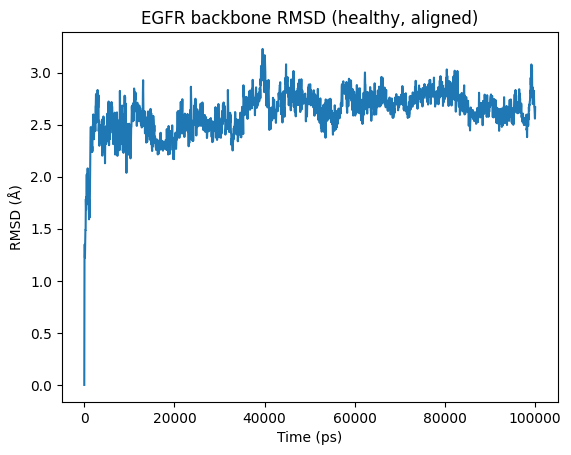

In [24]:
protein = healthy_univers.select_atoms("protein")

align.AlignTraj(
    healthy_univers, healthy_univers,
    select="protein and backbone",
    in_memory=True
).run()

R = rms.RMSD(
    protein, protein,
    select="backbone"
)
R.run()

# 3) Plotten
plt.plot(R.results.rmsd[:,1], R.results.rmsd[:,2])
plt.xlabel("Time (ps)")
plt.ylabel("RMSD (Å)")
plt.title("EGFR backbone RMSD (healthy, aligned)")
plt.show()

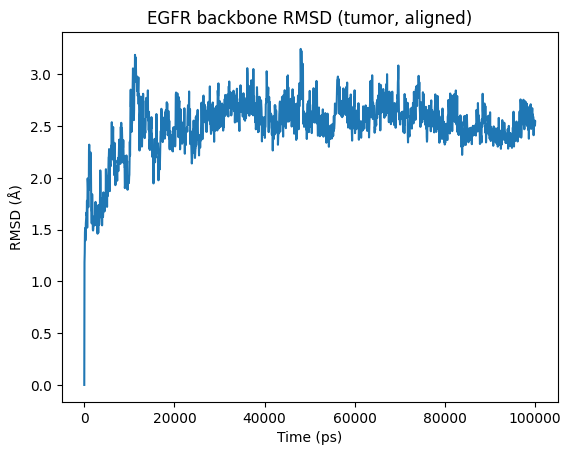

In [25]:
protein = tumor_univers.select_atoms("protein")

align.AlignTraj(
    tumor_univers, tumor_univers,
    select="protein and backbone",
    in_memory=True
).run()

# 2) RMSD berekenen voor tumor
R = rms.RMSD(
    protein, protein,
    select="backbone"
)
R.run()

# 3) Plotten
plt.plot(R.results.rmsd[:,1], R.results.rmsd[:,2])
plt.xlabel("Time (ps)")
plt.ylabel("RMSD (Å)")
plt.title("EGFR backbone RMSD (tumor, aligned)")
plt.show()


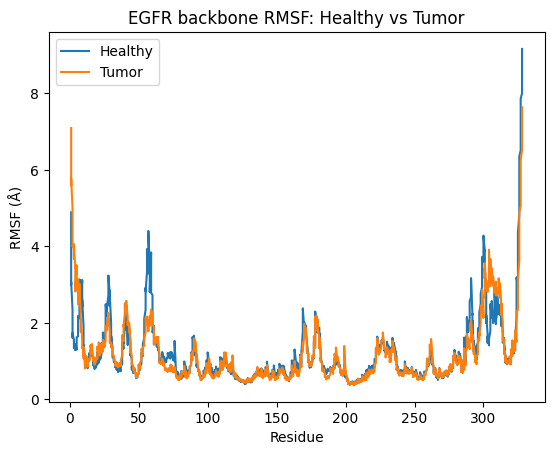

In [26]:
bb_h = healthy_univers.select_atoms("protein and backbone")
bb_t = tumor_univers.select_atoms("protein and backbone")

rmsf_h = rms.RMSF(bb_h).run()
rmsf_t = rms.RMSF(bb_t).run()

plt.plot(bb_h.resids, rmsf_h.results.rmsf, label="Healthy")
plt.plot(bb_t.resids, rmsf_t.results.rmsf, label="Tumor")
plt.xlabel("Residue")
plt.ylabel("RMSF (Å)")
plt.legend()
plt.title("EGFR backbone RMSF: Healthy vs Tumor")
plt.show()

Met MDAnalysis en DSSP is de secundaire structuur van het eiwit per frame bepaald. Alleen residuen met een volledige backbone zijn meegenomen. DSSP-classificaties zijn samengevoegd tot helix, β-sheet en coil. De heatmaps laten zien dat de globale secundaire structuur stabiel blijft, met lokale verschillen tussen healthy en tumor

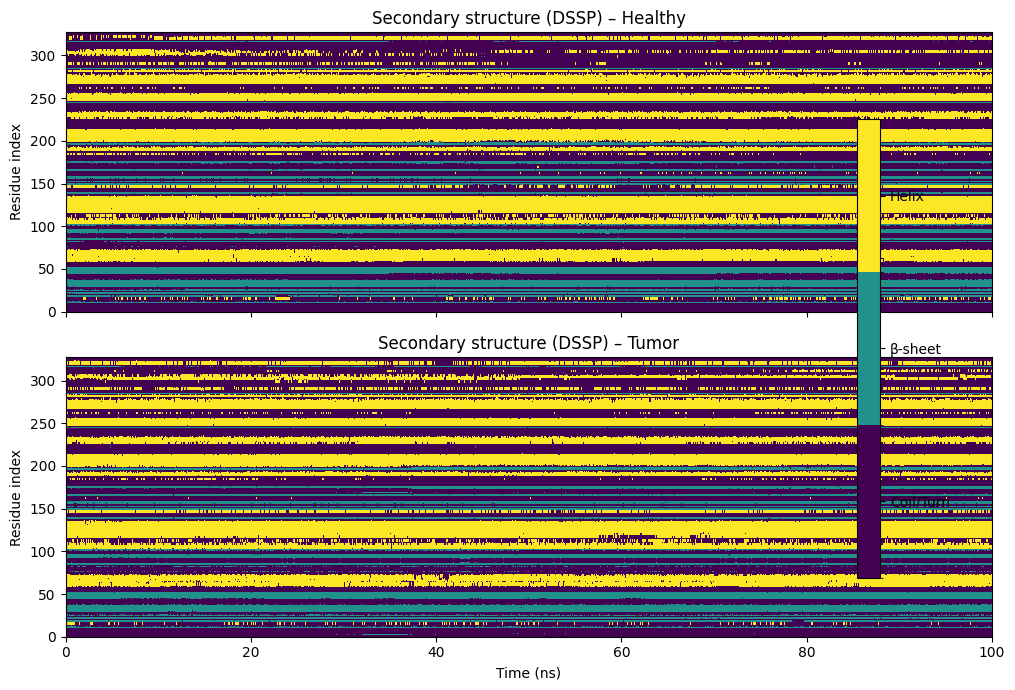

In [27]:

def complete_backbone_resindices(u, selection="protein"):
    ag = u.select_atoms(selection)
    keep = []
    for r in ag.residues:
        if {"N","CA","C","O"}.issubset(set(r.atoms.names)):
            keep.append(r.ix)   
    return np.array(keep, dtype=int)

def dssp_matrix(u, selection="protein"):
    keep_ix = complete_backbone_resindices(u, selection)
    ag = u.select_atoms(selection).residues[keep_ix].atoms

    d = DSSP(ag).run()
    dssp_strings = d.results.dssp

    mapping = {"H":2,"G":2,"I":2, "E":1,"B":1, "C":0,"T":0,"S":0,"-":0}
    M = np.array([[mapping.get(ch, 0) for ch in frame] for frame in dssp_strings], dtype=int)

    t_ns = d.times / 1000.0   #]
    resids = ag.residues.resids
    return M, t_ns, resids

# Healthy / Tumor
M_h, t_h, r_h = dssp_matrix(healthy_univers)
M_t, t_t, r_t = dssp_matrix(tumor_univers)

# Force dezelfde residuen (belangrijk!)
common = np.intersect1d(r_h, r_t)
ih = np.where(np.isin(r_h, common))[0]
it = np.where(np.isin(r_t, common))[0]
M_h = M_h[:, ih]
M_t = M_t[:, it]

# Discrete colormap (0/1/2)
cmap = ListedColormap(["#440154", "#21918c", "#fde725"])
norm = BoundaryNorm([-0.5, 0.5, 1.5, 2.5], cmap.N)

fig, ax = plt.subplots(2, 1, figsize=(11, 7), sharex=True)

im0 = ax[0].imshow(M_h.T, aspect="auto", origin="lower",
                   cmap=cmap, norm=norm, interpolation="nearest",
                   extent=[t_h.min(), t_h.max(), 0, M_h.shape[1]])
ax[0].set_title("Secondary structure (DSSP) – Healthy")
ax[0].set_ylabel("Residue index")

im1 = ax[1].imshow(M_t.T, aspect="auto", origin="lower",
                   cmap=cmap, norm=norm, interpolation="nearest",
                   extent=[t_t.min(), t_t.max(), 0, M_t.shape[1]])
ax[1].set_title("Secondary structure (DSSP) – Tumor")
ax[1].set_xlabel("Time (ns)")
ax[1].set_ylabel("Residue index")

cbar = fig.colorbar(im1, ax=ax, ticks=[0,1,2], shrink=0.85)
cbar.ax.set_yticklabels(["Coil/Turn", "β-sheet", "Helix"])

plt.tight_layout(rect=[0, 0, 0.92, 1])
plt.show()


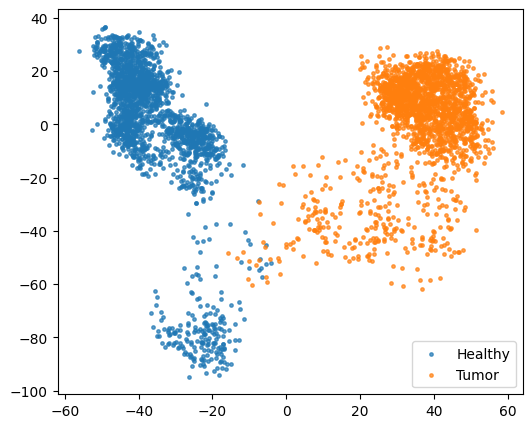

In [43]:
sel = "protein and backbone"

healthy_sel = healthy_univers.select_atoms(sel)
tumor_sel   = tumor_univers.select_atoms(sel)

# Healthy als vaste referentie (frame 0)
align.AlignTraj(
    healthy_univers, healthy_univers,
    select=sel, in_memory=True, ref_frame=0
).run()

# Tumor -> Healthy (frame 0)
align.AlignTraj(
    tumor_univers, healthy_univers,
    select=sel, in_memory=True, ref_frame=0
).run()

def get_coords(universe, atoms):
    coords = []
    for ts in universe.trajectory:
        coords.append(atoms.positions.copy())
    return np.array(coords)

X_healthy = get_coords(healthy_univers, healthy_sel)
X_tumor   = get_coords(tumor_univers, tumor_sel)

X = np.concatenate([X_healthy, X_tumor], axis=0)
Xflat = X.reshape(X.shape[0], -1).astype(np.float64)
Xflat -= Xflat.mean(axis=0, keepdims=True)

T = Xflat.shape[0]
C = (Xflat @ Xflat.T) / (T - 1)

eigvals, eigvecs = np.linalg.eigh(C)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

loadings = Xflat.T @ eigvecs
loadings /= np.linalg.norm(loadings, axis=0, keepdims=True)

scores = Xflat @ loadings
pc1, pc2 = scores[:, 0], scores[:, 1]

n_h = X_healthy.shape[0]
plt.figure(figsize=(6,5))
plt.scatter(pc1[:n_h], pc2[:n_h], s=6, label="Healthy", alpha=0.7)
plt.scatter(pc1[n_h:], pc2[n_h:], s=6, label="Tumor", alpha=0.7)
plt.legend()
plt.show()


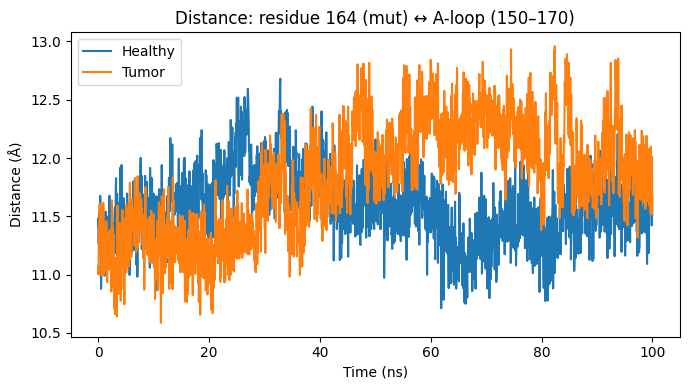

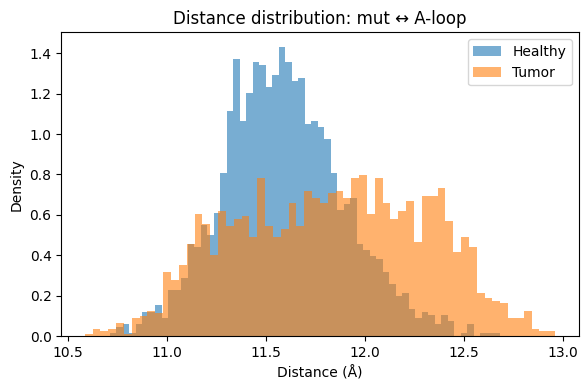

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def com_distance_over_time(u, sel1, sel2):
    a = u.select_atoms(sel1)
    b = u.select_atoms(sel2)
    if a.n_atoms == 0 or b.n_atoms == 0:
        raise ValueError(f"Empty selection: sel1={a.n_atoms} atoms, sel2={b.n_atoms} atoms")
    d = []
    for ts in u.trajectory:
        com1 = a.center_of_mass()
        com2 = b.center_of_mass()
        d.append(np.linalg.norm(com1 - com2))
    return np.array(d)

# fragment (1–328) nummering:
sel_mut   = "protein and resid 164 and name CA"
sel_aloop = "protein and resid 150-170 and backbone"

d_h = com_distance_over_time(healthy_univers, sel_mut, sel_aloop)
d_t = com_distance_over_time(tumor_univers,   sel_mut, sel_aloop)

dt_ns = 0.05  # pas aan indien nodig
t_h = np.arange(len(d_h))*dt_ns
t_t = np.arange(len(d_t))*dt_ns

# Tijdserie
plt.figure(figsize=(7,4))
plt.plot(t_h, d_h, label="Healthy")
plt.plot(t_t, d_t, label="Tumor")
plt.xlabel("Time (ns)")
plt.ylabel("Distance (Å)")
plt.title("Distance: residue 164 (mut) ↔ A-loop (150–170)")
plt.legend()
plt.tight_layout()
plt.show()

# Distributie
plt.figure(figsize=(6,4))
plt.hist(d_h, bins=60, alpha=0.6, density=True, label="Healthy")
plt.hist(d_t, bins=60, alpha=0.6, density=True, label="Tumor")
plt.xlabel("Distance (Å)")
plt.ylabel("Density")
plt.title("Distance distribution: mut ↔ A-loop")
plt.legend()
plt.tight_layout()
plt.show()


***

## Les 4: Vergelijkende analyse van wild-type en mutant

### Inleiding



### Opdracht



De L->R-mutatie (leucine naar arginine) verandert lokaal een hydrofobe, neutrale zijketen in een grote, positief geladen zijketen. Zo’n switch heeft twee directe structurele gevolgen: (1) verlies van hydrophobe packing op de mutatieplek en (2) nieuwe elektrostatische interacties (zoutbruggen/H-bruggen) met nabije (negatief geladen) residuen. Daardoor kan de omgeving rond de mutatie én aangrenzende regulatoire lussen (zoals de A-loop, 150–170) in een andere “voorkeursstand” terechtkomen.

Dat zie je terug in je analyses:

RMSD: beide systemen stabiliseren rond ~2.5–3 Å -> het eiwit blijft globaal gevouwen en stabiel; het is dus geen unfolding, maar een conformatieshift binnen een stabiele fold.

RMSF: de meeste residuen blijven vergelijkbaar flexibel, met verschillen vooral in lus-/terminaleregios -> consistent met lokale dynamiekveranderingen i.p.v. globale instabiliteit.

DSSP: de secundaire structuur blijft grotendeels behouden -> het effect zit vooral in herpositionering van lussen en subtiele herverdeling van dynamiek, niet in massale helix/β-omklap.

PCA: Healthy en Tumor scheiden heel sterk langs PC1 -> de mutatie duwt het ensemble naar een ander conformationeel landschap (andere dominante bewegingsmodus).

Afstand mut <-> A-loop (150–170): in Tumor ligt de afstand gemiddeld hoger (distributie naar rechts verschoven) -> dit wijst erop dat de A-loop in de tumor-simulatie vaker verder weg / “meer open” staat t.o.v. de mutatieregio.

Biologische interpretatie: de L->R-mutatie kan de lokale elektrostatische omgeving zó veranderen dat de A-loop (en daarmee de regulatie van de actieve site) makkelijker in een actieve/meer open toestand wordt gestabiliseerd. Dit past bij het idee van een activerende mutatie: niet omdat het eiwit instort, maar omdat de mutatie het evenwicht verschuift naar een conformatie die functioneel (kinase-)activiteit bevordert.

***

## Les 5

#### scripts:
pca_viz_healthy.pml
pca_viz_mutated.pml

#### Images:

|             Healthy            |             Mutated             |
|:------------------------------:|:-------------------------------:|
| ![](healthy_movement_site.png) | ![](mutation_movement_site.png) |
|  ![](mean_sticks_healthy.png)  |  ![](mean_sticks_mutated.png)   |


eerste colom is geeft de pca weer met het aminozuur van de mutatie in het wit. De tweede colom is de gemiddelde positie van elk atoom in de pca




#### Analyse:

Bij de pca analyses kun je zien dat bij de gezonde variant alles dezelfde kant op beweegt, maar de gemuteerde variant lijken andere aminozuren van het gemuteerde aminozuur weg te bewegen.
Bij de gemiddeldes lijken andere aminozuren ook dichter bij de normale variant te zitten dan bij de gemuteerde, maar dit is lastig om zeker vast te stellen.

***

&copy; 2025 - Tsjerk A. Wassenaar <t.a.wassenaar@pl.hanze.nl>